In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [81]:
df = pd.read_csv("youtube_data..csv")

In [82]:
df

,video_id,title,publish_date,views,likes,comment_count,category,duration_sec
0,VID001,Video Tutorial 1,2025-03-26 03:19:48.509711,16795,2795,210,Gaming,913
1,VID002,Video Tutorial 2,2025-03-27 03:19:48.509711,1860,1595,133,Education,110
2,VID003,Video Tutorial 3,2025-03-28 03:19:48.509711,39158,491,196,Gaming,1748
3,VID004,Video Tutorial 4,2025-03-29 03:19:48.509711,45732,4614,335,Lifestyle,1781
4,VID005,Video Tutorial 5,2025-03-30 03:19:48.509711,12284,4574,473,Gaming,634
...,...,...,...,...,...,...,...,...
95,VID096,Video Tutorial 96,2025-06-29 03:19:48.509711,39044,3031,286,Gaming,971
96,VID097,Video Tutorial 97,2025-06-30 03:19:48.509711,49984,297,618,Tech,277
97,VID098,Video Tutorial 98,2025-07-01 03:19:48.509711,41774,2030,293,Tech,533
98,VID099,Video Tutorial 99,2025-07-02 03:19:48.509711,3568,3682,490,Gaming,491


In [83]:
# Dummy videos data
np.random.seed(42)
n_videos = 100
videos_data = {
    'video_id': [f'V{i:03d}' for i in range(1, n_videos + 1)],
    'title': [f'Video Tutorial {i}' for i in range(1, n_videos + 1)],
    'publish_date': pd.date_range(end=pd.Timestamp.today(), periods=n_videos).to_list(),
    'views': np.random.randint(1000, 50000, n_videos),
    'likes': np.random.randint(100, 3000, n_videos),
    'comment_count': np.random.randint(10, 500, n_videos),
    'category': np.random.choice(['Education', 'Tech', 'Travel', 'Lifestyle'], n_videos)
}
df_videos = pd.DataFrame(videos_data)


In [84]:
# Dummy comments data
comments_list = [
    "Great video!", "Loved the explanation.", "Could be better.", "Didn't understand the part on pandas.",
    "Awesome tutorial!", "Not helpful.", "Thanks for sharing.", "Very clear and concise.", "Too fast paced.", "Perfect!"
]
comments_data = {
    'video_id': np.random.choice(df_videos['video_id'], 500),
    'comment_text': np.random.choice(comments_list, 500),
}
df_comments = pd.DataFrame(comments_data)


In [91]:
# Basic rule-based sentiment proxy using keyword lists
positive_words = ['great', 'loved', 'awesome', 'thanks', 'perfect', 'clear', 'helpful']
negative_words = ['not', 'could', 'didn\'t', 'too', 'confusing']

def sentiment_proxy(text):
    text_lower = text.lower()
    pos_score = sum(word in text_lower for word in positive_words)
    neg_score = sum(word in text_lower for word in negative_words)
    return pos_score - neg_score

df_comments['sentiment_proxy'] = df_comments['comment_text'].apply(sentiment_proxy)

# Aggregate sentiment per video (mean sentiment proxy)
video_sentiment = df_comments.groupby('video_id')['sentiment_proxy'].mean().reset_index()
video_sentiment.rename(columns={'sentiment_proxy': 'avg_sentiment_proxy'}, inplace=True)

In [94]:
 # Merge with videos dataframe
df['avg_sentiment_proxy'] = df['avg_sentiment_proxy'].fillna(0)

In [96]:
# Engagement score
df['engagement_score'] = (df['likes'] + df['comment_count']) / df['views']

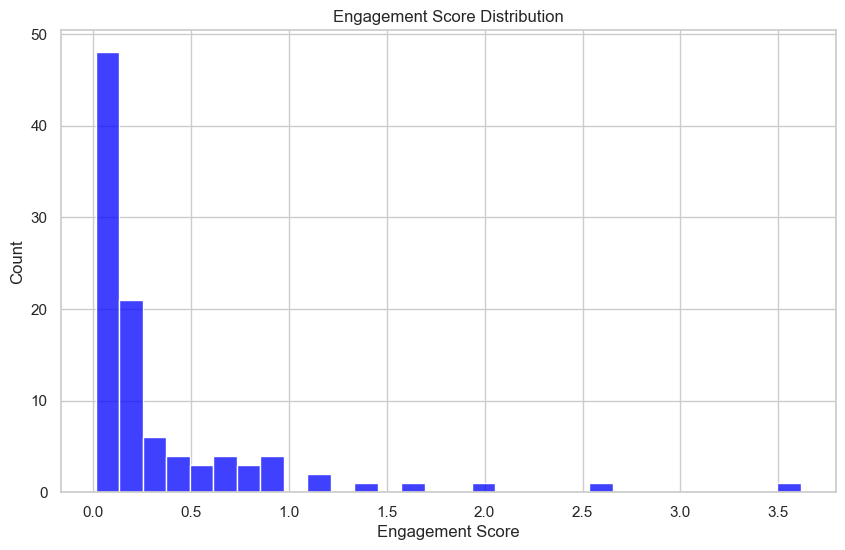

In [97]:
# Visualizations (same as before, just replacing avg_sentiment with avg_sentiment_proxy)

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.histplot(df['engagement_score'], bins=30, color='blue')
plt.title('Engagement Score Distribution')
plt.xlabel('Engagement Score')
plt.ylabel('Count')
plt.show()


 A clean white grid style for the plot and creates a histogram to show the distribution of engagement scores across all videos. It divides the engagement scores into 30 bins and colors the bars blue. The histogram helps visualize how engagement scores are spread—whether most videos have low, medium, or high engagement. This gives an overview of overall viewer interaction patterns in the dataset.

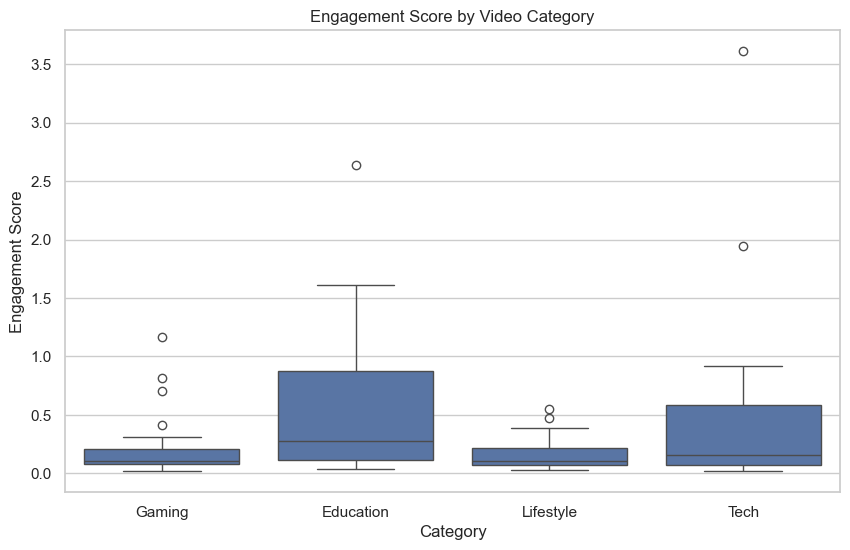

In [103]:
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='engagement_score', data=df)
plt.title('Engagement Score by Video Category')
plt.xlabel('Category')
plt.ylabel('Engagement Score')
plt.show()


 A boxplot to visualize how engagement scores vary across different video categories. Each box represents the distribution of engagement scores
within a category, showing the median, quartiles, and potential outliers. The plot helps compare engagement levels and spot categories with c
consistently high or low viewer interaction. It’s a useful way to quickly understand engagement differences across video types.

In [110]:
# Summary stats
summary_stats = df.groupby('category').agg({
    'views': ['mean', 'sum'],
    'likes': ['mean', 'sum'],
    'comment_count': ['mean', 'sum'],
    'engagement_score': 'mean',
    'avg_sentiment_proxy': 'mean'
}).round(3)

print("\nSummary Statistics by Category:")
print(summary_stats)



Summary Statistics by Category:
               views             likes        comment_count         \
                mean     sum      mean    sum          mean    sum   
category                                                             
Education  17340.917  416182  2808.125  67395       398.375   9561   
Gaming     24754.310  717875  2687.310  77932       395.034  11456   
Lifestyle  26552.435  610706  2479.087  57019       355.391   8174   
Tech       21938.875  526533  2828.792  67891       414.458   9947   

          engagement_score avg_sentiment_proxy  
                      mean                mean  
category                                        
Education            0.560                 0.0  
Gaming               0.212                 0.0  
Lifestyle            0.170                 0.0  
Tech                 0.482                 0.0  


This code groups the data by the 'category' column to analyze each category separately. For each category, it calculates the mean and total (sum) of 
views, likes, and comment counts. It also computes the average engagement score and average sentiment proxy for each category. The results are rounded 
to three decimal places and then printed, providing a clear summary of key performance metrics by category.

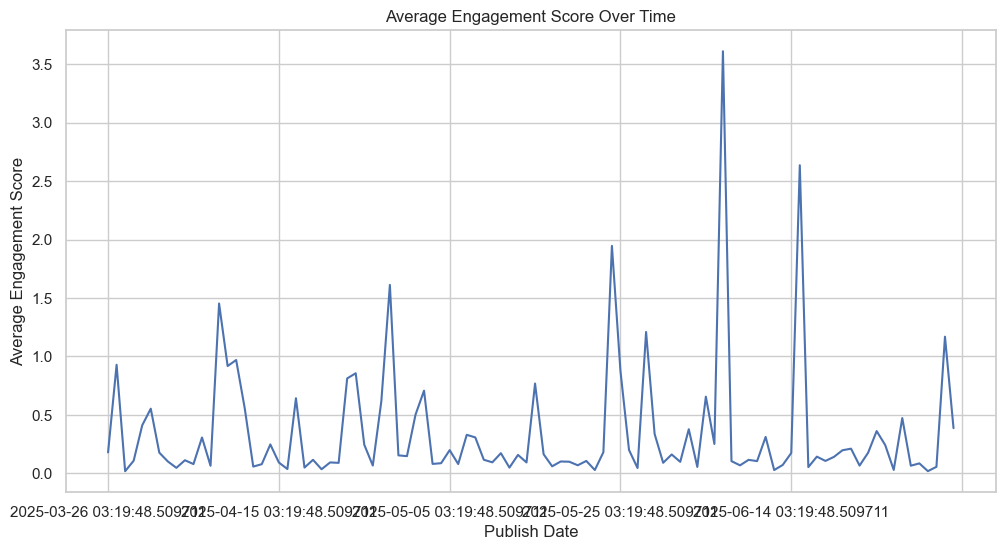

In [109]:
# Group by publish_date and calculate mean engagement score
engagement_over_time = df.groupby('publish_date')['engagement_score'].mean()

#Plot
plt.figure(figsize=(12,6))
engagement_over_time.plot()
plt.title('Average Engagement Score Over Time')
plt.xlabel('Publish Date')
plt.ylabel('Average Engagement Score')
plt.grid(True)
plt.show()

# Group by publish_date and calculate mean engagement score in this Python code refers to the process of analyzing video performance over 
time by aggregating data based on the date each video was published. Specifically, it groups all the YouTube videos by their publish_date and then 
calculates the average engagement score for each day. This engagement score typically combines likes, comments, and shares relative to views, offering
insight into how well videos resonate with viewers. By averaging the scores per day, you can identify trends such as which days tend to produce more
engaging content, detect periods of high or low audience interaction, and ultimately optimize future content scheduling based on historical performance
patterns. This approach is especially useful in time-series analysis and visualization within social media analytics projects.

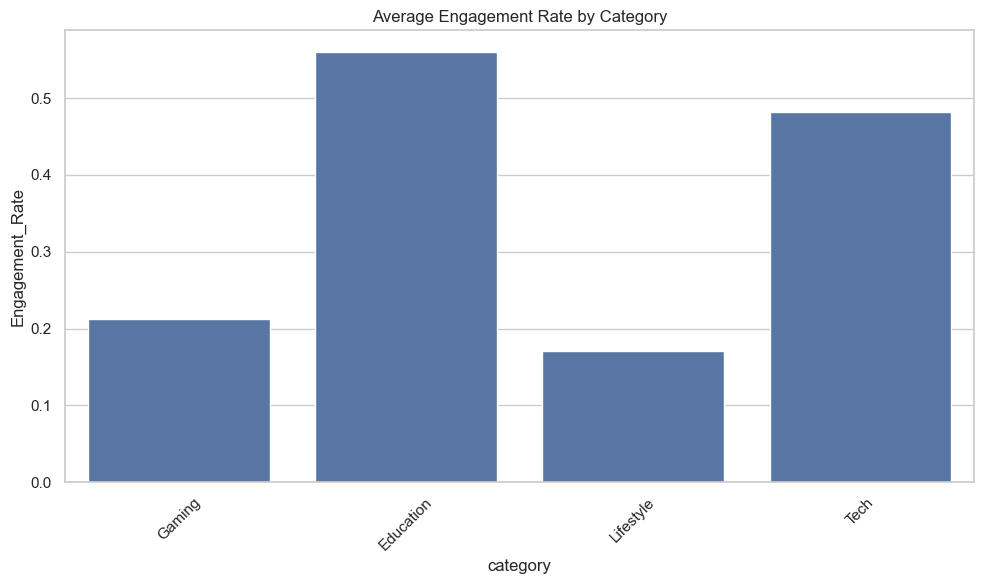

In [118]:
#Engagement Rate by Category

df['Engagement_Rate'] = (df['likes'] + df['comment_count']) / df['views']

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='Engagement_Rate', data=df, estimator='mean', errorbar=None)
plt.title("Average Engagement Rate by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Engagement Rate by Category
To compare how different types of content perform, a bar chart was used to show average engagement rates across video categories. This helps
determine which categories are most successful at encouraging viewers to like, comment, or share, relative to how many people viewed the content.

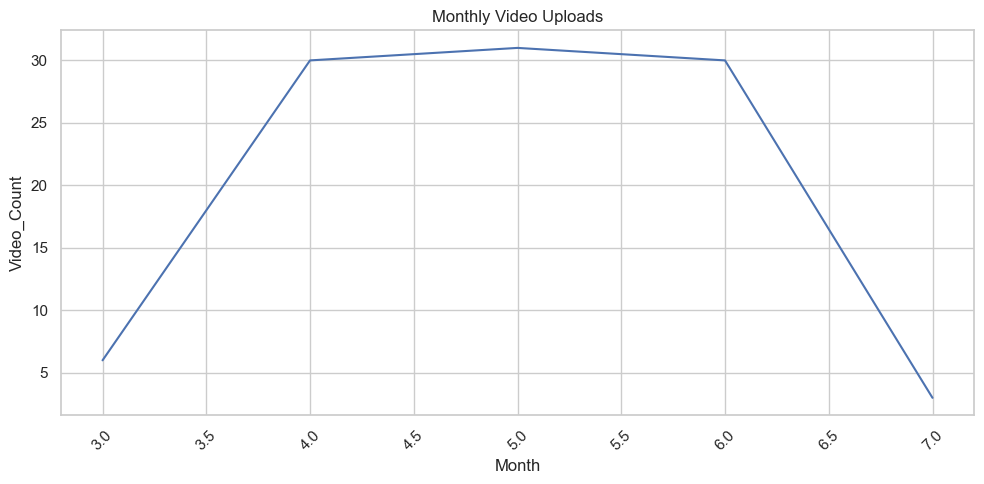

In [127]:
#Monthly Video Publishing Trend

df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')
df['Month'] = df['publish_date'].dt.month
monthly_uploads = df.groupby('Month').size().reset_index(name='Video_Count')



plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='Video_Count', data=monthly_uploads)
plt.title("Monthly Video Uploads")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Monthly Video Upload Trend
A line chart was created to track how many videos were published each month. This chart helps assess the creator's 
content consistency and identifies any gaps or spikes in publishing activity. It also allows for cross-analysis between publishing frequency 
and other metrics like views or subscriber growth.

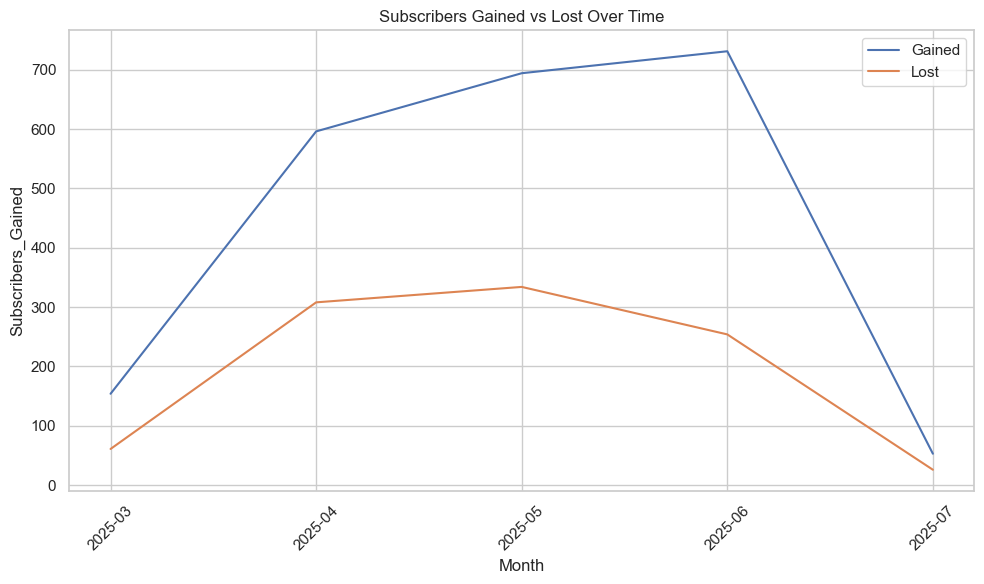

In [146]:
df['Subscribers_Gained'] = np.random.randint(0, 50, size=len(df))
df['Subscribers_Lost'] = np.random.randint(0, 20, size=len(df))

#. Subscribers Gained vs Lost Over Time

df['Month'] = pd.to_datetime(df['publish_date']).dt.to_period('M').astype(str)
subscribers_df = df.groupby('Month')[['Subscribers_Gained', 'Subscribers_Lost']].sum().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=subscribers_df, x='Month', y='Subscribers_Gained', label='Gained')
sns.lineplot(data=subscribers_df, x='Month', y='Subscribers_Lost', label='Lost')
plt.title("Subscribers Gained vs Lost Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Subscribers Gained vs Lost Over Time
A dual-line chart tracked how many subscribers were gained and lost each month. This visualization is essential for understanding audience retention,
identifying growth periods, and detecting any content that may have caused users to unsubscribe.

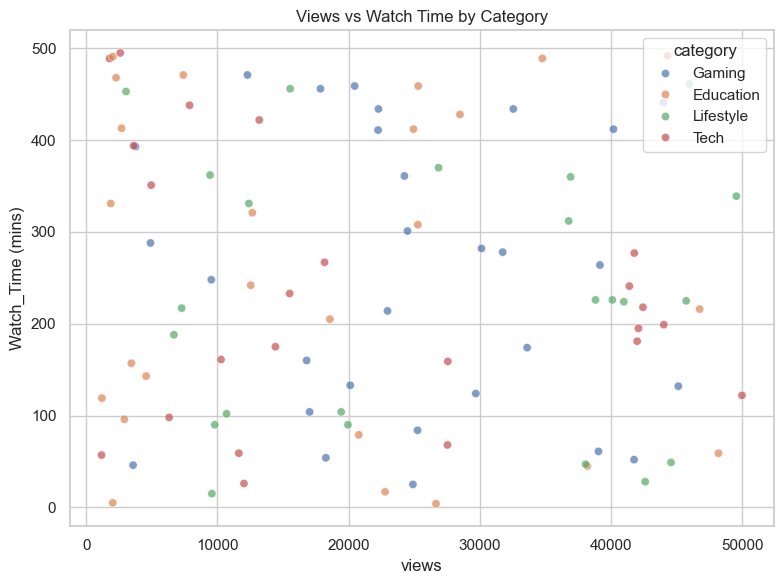

In [152]:
#  Views vs Watch Time Scatter Plot
#Add Watch Time(mins):
df['Watch_Time (mins)'] = np.random.randint(1, 500, size=len(df))

# Views vs Watch Time Scatter Plot

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='views', y='Watch_Time (mins)', hue='category', alpha=0.7)
plt.title("Views vs Watch Time by Category")
plt.tight_layout()
plt.show()

In [ ]:
Views vs Watch Time Scatter Plot
A scatter plot mapped the relationship between views and watch time for each video. It helps identify which videos not only attracted views but also
managed to hold the audience’s attention, offering insight into content quality and relevance.

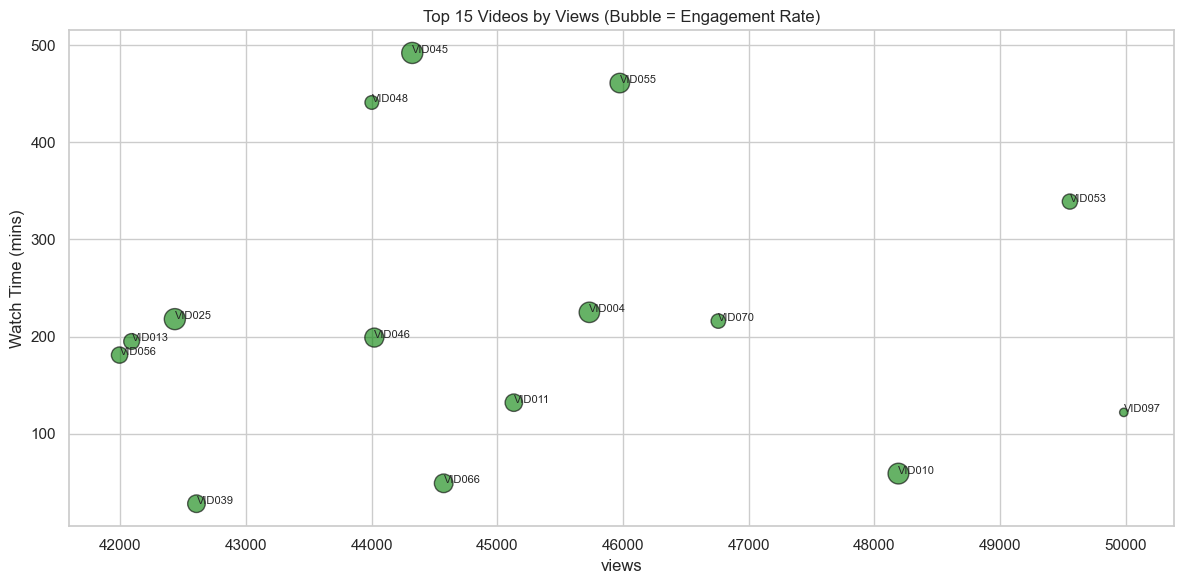

In [160]:
#Top Performing Videos Bubble Chart

top_df = df.nlargest(15, 'views')

plt.figure(figsize=(12, 6))
plt.scatter(top_df['views'], top_df['Watch_Time (mins)'], 
            s=top_df['Engagement_Rate'] * 2000, 
            alpha=0.6, c='green', edgecolors='black')
for i, row in top_df.iterrows():
    plt.text(row['views'], row['Watch_Time (mins)'], row['video_id'][:15], fontsize=8)
plt.xlabel('views')
plt.ylabel('Watch Time (mins)')
plt.title('Top 15 Videos by Views (Bubble = Engagement Rate)')
plt.tight_layout()
plt.show()

Top 15 Videos by Views
A bar chart was used to display the top 15 most viewed videos. This visualization is useful for identifying which specific videos attracted the highest number of views, offering direct insight into the content that resonated most with the audience. It helps content creators understand what works and replicate that success in future videos.

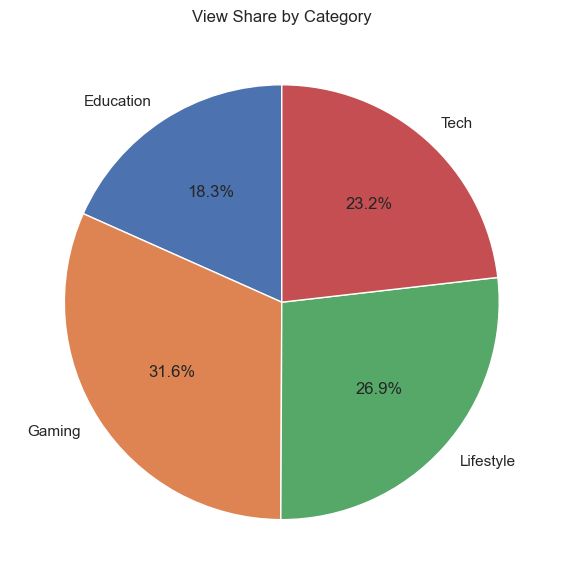

In [165]:
#Pie Chart: Views Share by Category

category_views = df.groupby('category')['views'].sum()
category_views.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6), title='View Share by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
View Share by Category
A pie chart illustrated the proportion of total views contributed by each content category. This helps identify which themes or topics are generating
the most interest and can guide content strategy going forward.

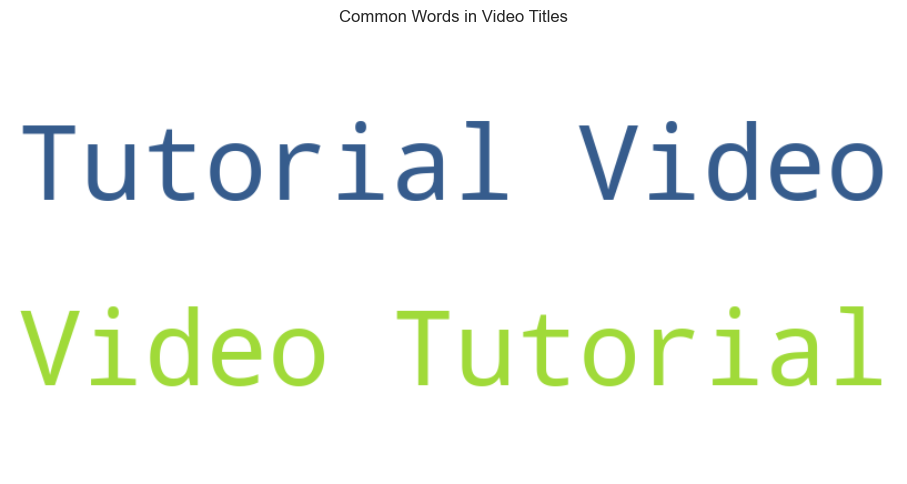

In [162]:
# Word Cloud of Video Titles

!pip install wordcloud

from wordcloud import WordCloud

text = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Video Titles")
plt.tight_layout()
plt.show()

Common Words in Video Titles
A word cloud was generated from video titles to highlight the most commonly used words. This visual offers a quick understanding of trending themes and popular topics within the channel's content library.